# Autoencoders

Los **Autoencoders** son otro algoritmo de aprendizaje automático que corresponde a los modelos de **Aprendizaje No Supervisado**, y que vamos a aprender ya mismo.

Los **Autoencoders** son una herramienta muy poderosa, diseñada para aprender representaciones eficientes de los datos. La máquina va a aprender a representar los datos de manera eficiente, y te aseguro que ya vas a ver a qué me refiero.

Un Autoencoder básicamente lo que hace es intentar **aprender una función que comprime los datos que recibe**, reduciéndolos a una representación codificada de dimensión mucho menor, y **luego los reconstruye** de vuelta a su forma original o una aproximación cercana a ella.

Para decirlo en palabras muy simples, imagina que tienes un dibujo gigante, pero quieres guardarlo en tu bolsillo. Un autoencoder mira tu dibujo, descubre los puntos más importantes, y luego hace una versión miniatura de él. Después, cuando quieras ver tu dibujo otra vez en tamaño normal, el autoencoder puede recrearlo casi perfecto en su tamaño original, a paetir de una fórmula que ha utilizado para comprimirlo y descomprimirlo.


### ¿Para qué sirve un autoencoder?

Básicamente, ayuda a guardar cosas grandes en espacios pequeñitos.


### Aplicación práctica

Antes de poner en práctica los **Autoencoders** vamos a necesitar trabajar con una librería de python llamada **tensorflow**, que a diferencia de todas las librerías con las que hemos estado trabajando hasta el momento, no ha sido instalada en tu ordenador cuando instalaste anaconda, por lo tanto no puedes importarla aún.

Para eso, te comparto [este otro cuaderno](Instalar%20tensorflow.ipynb), que contiene el código para **instalar tensorflow** en tu ordenador. Antes de avanzar con este práctica, simplemente ábrelo y ejecuta su contenido. Solo tendrás que hacer esto una vez en tu computadora, y luego ya podrás importar **tensorflow** en cualquier cuaderno Jupyter en el que quieras utilizarlo.


Ahora sí, comencemos **importando todas las librerías** que necesitaremos para este ejercicio, que son varias.

In [1]:
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

Ahora vamos a llamar a un dataset muy interesante que se llama `digits`.

In [2]:
digitos = load_digits()
digitos

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

Y digo que este dataset es interesante porque lo que contiene es información que sirve para construir imágenes.

Iris es un diccionario que contiene, entre otras cosas, una clave `data`, cuyo valor es una colección de arrays, que contiene **1797 imágenes de 8 pixels de ancho por 8 pixels de alto**. En realidad lo que tiene son arrays de dos dimensiones cuyo contenido son números que representan el valor de gris de cada pixel, por lo que podemos usar esa información para crear **mapas de bits** que forman imágenes.

Veamos un ejemplo, tomemos el índice `0` de esta base de datos.

In [3]:
digitos['data'][0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

Aquí vemos que cada índice de `digits['data']` contiene un **array de 64 elementos**. Ahora probemos visualizar estos números pero con el formato de **8 por 8**.

In [4]:
digitos['data'][0].reshape(8, 8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Aquí ya nos va comenzando a quedar un poco más claro a qué nos referimos con **mapa de bits**.

Cada elemento del array representa un bit de una imagen, y su valor dice qué tan claro debe ser el bit que representa.

Y ahora la magia: vamos a representar esto con matplotlib.

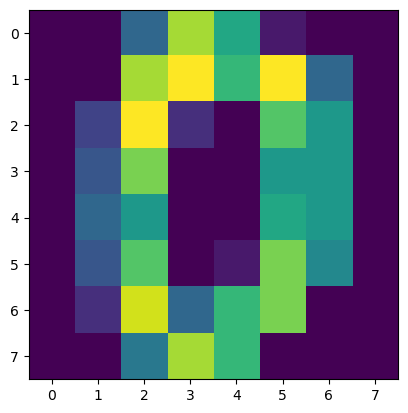

In [5]:
plt.imshow(digitos['data'][0].reshape(8, 8))

Y ahí lo tienes. Nuestra imagen es el dibujo a mano del número `0`.

Eso es lo que contiene esta base de datos llamada `digits`: 1797 imágenes de 8 bits que representan dígitos escritos a mano.

Haz tu miso el intento de cambiar el índice `[0]` por el número que quieras entre **0** y **1797** para ver los diferentes números.

Incluso te voy a mostrar un truco que lo hace más simple. `digits` trae una función llamada `images()` que nos permite seleccionar a nuestros dígitos mucho más fácilmente, pero no te la enseñé al comienzo para que puedas entender mejor la lógica que subyace en la estructura de `digits`.

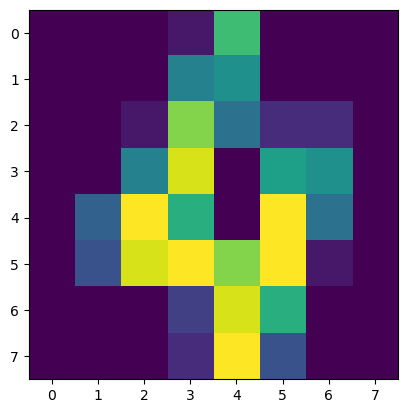

In [6]:
plt.imshow(digitos.images[4]);

Muy bien, ahora que conoces el dataset con el que estamos trabajando, veamos cómo aplicar los **Autoencoders** en este caso.

Vamos a necesitar una variable `X` (mayúscula) que contenga todas las imágenes de dígitos que hay en el dataset. Para eso vamos a recurrir a la función `data` que nos brinda `digits`.

In [7]:
X = digitos.data

En este caso no vamos a necesitar una variable `y`, así que directamente no la creamos.

El siguiente paso es **normalizar nuestros números**. Recuerda que normalizar valores significa asegurarnos que todos comienzan y terminan dentro del mismo rango numérico. En este caso podemos hacerlo así:

In [8]:
X = X / 16.0

¿Por qué los normalizo de esta manera? Porque típicamente los números de `digits` tienen valores en el rango de **0** a **16** para cada píxel. Al dividir cada número por `0.16` me aseguro de que su valor termine estando entre **0** y **1**, sin afectar la precisión de las relaciones de valor que hay entre ellos. Básicamente es como reducir la escala de un mapa.

La normalización es un paso esencial en este caso porque así facilitamos el proceso de entrenamiento de la red neuronal. Podríamos no hacerlo, pero normalizar los datos ayuda a prevenir problemas numéricos durante el entrenamiento, como el desbordamiento de números, y generalmente permite que el algoritmo converja más rápidamente hacia una solución.

Con nuestros datos normalizados, vamos a dividirlos entre **entrenamiento** y **prueba**:

In [9]:
X_entrena, X_prueba = train_test_split(X, test_size=0.2, random_state=42)

Ahora viene la parte desafiante, que es construir el **autoecoder** usando `keras`, que es el modelo que importamos al comienzo del cuaderno.

In [10]:
imagen_entrada = Input(shape=(64, ))

Aquí estoy creando una variable que contiene la función `Input` (con **I** mayúscula), que no es el `input` (con **i** minúscula) que hemos usado hasta ahora para pedirle al usuario que ingrese algo, sino la función `Input` de `keras.layers` que hemos importado al comienzo del cuaderno desde `tensorflow`.

Este `Input` se utiliza para instanciar una nueva capa de entrada, que llamamos ***capa tensorial***. Básicamente es la forma específica que el modelo va a esperar que tengan nuestros datos. Y aquí le estamos diciendo, que nuestros arrays de 8 por 8 van a ser pasados de manera aplanada, en un array de una sola dimensión, que va a tener 64 elementos. Este es el punto de partida para construir un modelo de red neuronal.

Ahora vamos a crear la variable `codificado`, que va a contener una red neuronal. Aquí las cosas pueden ponerse algo abstractas, así que las explicaré en detalle.

Primero escribiré la línea:

In [11]:
codificado = Dense(32, activation='relu') (imagen_entrada)

Esta variable `codificado` va a contener una **capa densa**. ¿Qué significa esto? Significa que va a ser una capa que va a contener muchos puntos de información, y que todos esos puntos van a estar conectados entre sí, como una red de neuronas donde cada neurona tiene una conexión directa con cada una de las demás neuronas. Se llama **densa** porque al ser una red con tantas conexiones, va a ser una red con una gran densidad.

Entonces para eso hemos usado `Dense` (que también es la función que importamos desde `keras` al comienzo del cuaderno), que es la función que se encarga de crear esa capa desde cero. El primer argumento que nos pide es el *número de nodos*, o de neuronas que va a tener nuestra red, y que se van a conectar todas entre sí. Yo he puesto `32`, como un punto de partida ilustrativo, pero no es un estándar fijo ni la única opción posible. Lo he elegido en este caso porque es la mitad de **64 pixels** por imagen.

La elección del número de neuronas en una capa de una red neuronal depende de varios factores y objetivos específicos del modelo y del conjunto de datos con el que estás trabajando. La decisión sobre cuántas neuronas utilizar puede influir en la capacidad del modelo para aprender patrones complejos en los datos:
+ Tener un número grande de neuronas puede aumentar la capacidad del modelo para aprender detalles finos de los datos de entrenamiento, lo que podría ser beneficioso si tu conjunto de datos es complejo y variado. Sin embargo, también aumenta el riesgo de que el modelo aprenda tanto, que aprende hasta el "ruido" en los datos de entrenamiento en lugar de las relaciones importantes generales, lo que puede perjudicar su rendimiento en datos nuevos.
+ Y por otro lado, si eliges un número muy pequeño de neuronas, el modelo podría no tener suficiente capacidad para aprender adecuadamente los patrones en los datos, lo que crearía un modelo demasiado simple que es incapaz de capturar la estructura subyacente de los datos.
	
En este caso la elección de `32` como el número de neuronas en el ejemplo es un balance entre estas consideraciones, proporcionando una cantidad moderada de capacidad de aprendizaje sin ser excesivamente compleja para un conjunto de datos relativamente simple como los dígitos manuscritos. Sin embargo, es completamente válido que experimentes con este número para encontrar el mejor rendimiento para tu tarea específica.

Sigamos analizando la función `Dense`. El siguiente argumento es `activation`, al que he establecido como `'relu'`. Aquí estoy especificando cuál va a ser la función de activación que usaremos en esta capa. `relu` se refiere *'Rectified Linear Unit'*, que es una de las funciones de activación más comunes en las redes neuronales debido a su simplicidad y eficacia.

Y finalmente `(imagen_entrada)` es la parte donde le indicamos a `Dense` que la capa densa que hemos definido, debe aplicarse a las entradas proporcionadas por `imagen_entrada`. 

Entonces ya tenemos nuestra capa `codificado`, que es una **capa densamente codificada**, ¿y qué objetivo va a cumplir esta capa? Bueno, imagina que tienes un grupo de amigos y les quieres pasar un mensaje a cada uno de ellos. En una capa densa, cada amigo representa una "neurona" o un punto donde puede ocurrir algo interesante con el mensaje. En este caso 32 amigos. Ahora, imagina que decides no solo pasar tu mensaje original a cada uno, sino que, basado en lo que sabes de cada amigo, modificas un poco el mensaje para cada uno. Quizás a algunos les añades un chiste porque sabes que les gusta reír, o a otros les haces el mensaje más corto porque prefieren las cosas directas.

Una capa densa en una red neuronal hace algo similar con la información que recibe. Piénsala como una capa llena de amigos (neuronas) donde cada uno recibe el mensaje (datos de entrada), y cada uno lo modifica un poco basado en sus propias "reglas" antes de pasarlo. Debido a que en una capa densa, cada neurona está conectada a todas las entradas, cada conexión puede pensar en el mensaje de manera diferente, añadiendo su propio giro único basado en cómo se haya entrenado la red.

Así que, en términos simples, una capa densa es **un grupo de neuronas trabajando juntas**, donde cada una contribuye un poco basada en su propio peso, para formar un nuevo mensaje (que es la salida de la capa) que combina todos sus puntos de vista.

Avancemos. Ahora que hemos construido el **codificador**, vamos a construir el **decodificador**. Porque todo lo que ha sido codificado necesita poder decodificarse en algún momento.

In [12]:
decodificado = Dense(64, activation='sigmoid') (codificado)

Entonces hemos usado la misma función `Dense`, pero esta vez le hemos dicho que queremos `64` nodos, que es un numero que generalmente va a ser igual a los puntos de entrada originales (que en nuestro caso eran **64 pixels**), y le he pedido que se use la función de activación `sigmoid` en esta capa, que es una función que convierte los valores de entrada a la capa en valores entre **0** y **1**, lo que es muy útil ya que los datos de entrada originalmente también estaban en este rango.

Y finalmente le hemos pedido que la capa `Dense` se aplique a la salida de la capa que codificación que creamos recién y que se llama `codificado`.

Pero aquí no termina todo. Esta ha sido la **preparación de los datos** y la **creación del codificador y del decodificador**. Ahora toca crear el **autoeconder** en sí mismo. Aquí es donde llamamos al algoritmo que queremos aplicar en esta lección:

In [13]:
autoencoder = Model(imagen_entrada, decodificado)

Y vamos a preparar el modelo de `autoencoder` para el **entrenamiento**, especificando cómo se debería actualizar durante el aprendizaje y cómo se medirá su rendimiento.

Vamos a usar la función `compile()` que es un método que prepara el modelo para el entrenamiento, dándole detalles cruciales sobre cómo debe aprender de los datos.

In [14]:
autoencoder.compile(optimizer='adam',
                   loss='binary_crossentropy')

¿Qué son esos parámetros en la función `compile()`?
+ `optimizer='adam'`: El optimizador es el algoritmo que ajusta los pesos del modelo. `'Adam'` es uno de los optimizadores más populares y efectivos porque ajusta la tasa de aprendizaje automáticamente y funciona bien en la mayoría de los casos sin mucha configuración.
+ `loss='binary_crossentropy'`: La función de pérdida (`loss`) mide qué tan bien el modelo está haciendo su trabajo, en este caso, reconstruyendo la entrada original a partir de la versión comprimida. `'Binary_crossentropy'` es una elección común cuando los datos de entrada son valores binarios o en el rango de **0** a **1**, porque esta función de pérdida compara cada píxel de la imagen de entrada con el píxel correspondiente de la imagen reconstruida.

En resumen, esta línea le dice al modelo que use el optimizador `adam` para ajustar sus pesos y minimizar la diferencia entre las entradas originales y las reconstruidas, medida por la función de pérdida de **entropía cruzada binaria**, durante el entrenamiento. 

Muy bien, con nuestro modelo de **autoencoder** configurado, ha llegado el momento de entrenarlo.

In [15]:
autoencoder.fit(X_entrena,
               X_entrena,
               epochs=100,
               batch_size=256,
               shuffle=True,
               validation_data=(X_prueba, X_prueba))

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.6969 - val_loss: 0.6786
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6743 - val_loss: 0.6566
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.6518 - val_loss: 0.6336
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6282 - val_loss: 0.6081
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6017 - val_loss: 0.5798
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5729 - val_loss: 0.5504
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5431 - val_loss: 0.5217
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5147 - val_loss: 0.4958
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4898 - val_loss: 0.4740
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4696 - val_loss: 0.4568
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4525 - val_loss: 0.4433
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4392 - val_loss: 0.43

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2877 - val_loss: 0.2911
Epoch 71/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2873 - val_loss: 0.2903
Epoch 72/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2868 - val_loss: 0.2895
Epoch 73/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2854 - val_loss: 0.2887
Epoch 74/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2840 - val_loss: 0.2880
Epoch 75/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2850 - val_loss: 0.2872
Epoch 76/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2831 - val_loss: 0.2865
Epoch 77/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2829 - val_loss: 0.2858
Epoch 78/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2822 - val_loss: 0.2851
Epoch 79/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2811 - val_loss: 0.2844
Epoch 80/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2803 - val_loss: 0.2837
Epoch 81/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2797 - val_loss: 0.2830
Epoch

Permíteme explicarte los parámetros que he usado en la función anterior:
+ `X_entrena`: Hemos usado el mismo conjunto de datos tanto para las **entradas** como para las **salidas esperadas** porque el objetivo es aprender a reconstruir las entradas originales a partir de las representaciones comprimidas.
+ `epochs=100`: Es el número de veces que repasará todo el conjunto de datos de entrenamiento.
+ `batch_size=256`: Durante el entrenamiento, los datos se dividen en pequeños paquetes o "lotes" que se procesan de forma independiente. `batch_size=256` indica que el modelo debería tomar **256** ejemplos de `X_entrena` a la vez, procesarlos, actualizar sus pesos y luego pasar al siguiente lote de 256 ejemplos. El uso de lotes ayuda a hacer el entrenamiento más eficiente. La elección de `256` como tamaño del lote es una decisión basada en la experiencia práctica, y funciona como un punto de partida razonable. Puedes modificarlo por supuesto.
+ `shuffle=True`: Los datos se deben mezclar antes de cada `epoch`. Esto ayuda a prevenir que el modelo aprenda el orden de los datos en lugar de las características subyacentes, mejorando aún más la generalización.
+ `validation_data`: Además de entrenar el modelo, también queremos monitorear su desempeño en un conjunto de datos que no ha visto durante el entrenamiento.

Entonces este bloque de código inicia el proceso de **entrenamiento del autoencoder**, y lo alimenta con datos de entrenamiento, diciéndole cuántas veces repasar esos datos, cómo agruparlos y en qué orden, y cómo comprobar que está aprendiendo correctamente usando un conjunto de prueba.

Al ejecutarlo podemos ver cómo va repitiendo el proceso en cada uno de los **100 epochs** que le hemos pedido que realice.

Y ahora sí, tenemos un modelo que ha encontrado la forma de codificar nuestras imágenes para que nos entren en el bolsillo, y también es capaz de decodificarlas para volver a representarlas.

Entonces vamos con el último paso, que es **visualizar nuestros resultados**.

Vamos a crear un bloque de código que tome **10 imágenes** del dataset, que las muestre cómo son inicialmente, y que las vuelva a representar luego de codificarlas y decodificarlas.

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


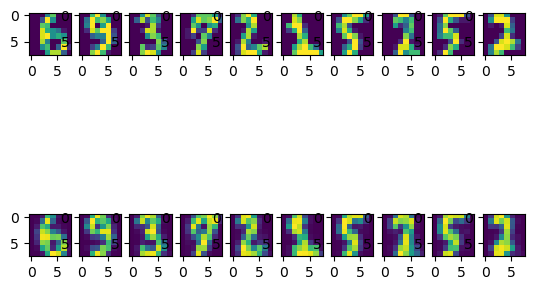

In [16]:
for i in range(10):
    plt.subplot(2,
               10,
               i + 1)
    plt.imshow(X_prueba[i].reshape(8, 8))
    
    plt.subplot(2,
               10,
               i + 1 + 10)
    plt.imshow(autoencoder.predict(X_prueba)[i].reshape(8, 8));

Con esto podemos ver la comparación de las imágenes antes y después de ser decodificadas, donde vemos que el resultado es prácticamente igual, con algunas pequeñas diferencias producto de todo el proceso, pero que aún así nos devuelve una imagen bastante fiel.

Esta ha sido una lección extensa, pero que creo que ha valido mucho la pena, así como la lección que sigue, que espero que no te la pierdas.